<a href="https://colab.research.google.com/github/Dutra-Apex/DS_JoC_Sessions/blob/main/Code/DS_Session_12-07-23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST data

We will be working with the MNIST data (https://en.wikipedia.org/wiki/MNIST_database), a famous dataset that consists of images of handwritten digits between 0 and 9. Our goal will be to have a model that can correctly classify the image of a handwritten digit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Loading and exploring the data



In [13]:
# Loading data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [14]:
# Examining data shape
print(train_images.shape) # 60000 images for training, each 28x28
print(test_images.shape)  # 10000 images for validation
print(train_labels.shape) # 1 label per image
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


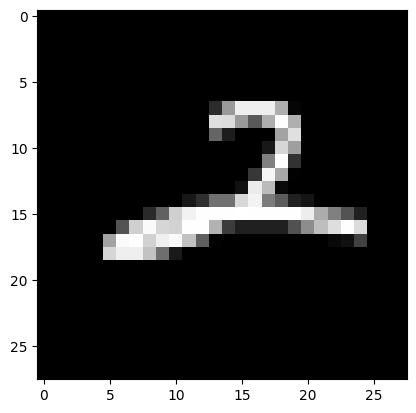

Label:  2


In [15]:
# Displaying data
n = np.random.randint(0, len(train_images))
plt.imshow(train_images[n], cmap="gray")
plt.show()

print("Label: ", train_labels[n])

## Prepping the data for the model

In [16]:
# Like most ML problems, it is also common practice to normalize the input
# This is done to avoid 'vanishing' and 'exploding' gradients
# Since we have images, and all images have pixel values ranging between 0 and 255,
# we can normalize the images by simply dividing the pixel values by 255:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [17]:
# We need to convert our labels into an array containing the probability for each class
# This is required for the loss function that we'll be using, and it can be done as follows:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [18]:
# Now, our labels are arrays, where each value corresponds to the probability
# of that class being the correct one, so a label '0' is now [1,0,0,0,0,0,0,0,0,0],
# a label of '1' is now [0,1,0,0,0,0,0,0,0,0], and so one...
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Making the model

In [19]:
# We can now use tensorflow to make a simple MLP
n_classes = 10
input_shape = (28,28)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape), # Transforms the 2D input into 1D
    tf.keras.layers.Dense(128, activation='relu'),    # Layer with 128 neurons, each with relu as their activation function
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax'), # Layer with 10 neurons, with the softmax function
])

# For a classification problem with multiple classes, a good loss function to choose
# is the categorical crossentropy function, which takes into account the probability
# predicted by the model for each class and compares it to the actual class.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

The crossentropy function is defined below:

$$H(p, q) = -\sum_i p_i \log q_i$$

where $p_i$ is the probability of class $i$ and $q_i$ is the predicted probability of class $i$.

In [20]:
# We may now train our model
epochs = 10
batch_size = 30

model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/10
2000/2000 [==============================] - 9s 3ms/step - loss: 0.2396 - accuracy: 0.9287 - val_loss: 0.1235 - val_accuracy: 0.9631
Epoch 2/10
2000/2000 [==============================] - 9s 5ms/step - loss: 0.1008 - accuracy: 0.9685 - val_loss: 0.0813 - val_accuracy: 0.9730
Epoch 3/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0705 - accuracy: 0.9778 - val_loss: 0.0815 - val_accuracy: 0.9751
Epoch 4/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0859 - val_accuracy: 0.9730
Epoch 5/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0928 - val_accuracy: 0.9737
Epoch 6/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.0338 - accuracy: 0.9886 - val_loss: 0.0825 - val_accuracy: 0.9769
Epoch 7/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.0279 - accuracy: 0.9906 - val_loss: 0.0832 - val_accur

## Evaluating the model

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0968 - accuracy: 0.9781
Test accuracy: 0.9781000018119812


The model obtained 97.8% accuracy on test set, meaning that only 2.2% of images are being misclassified!

1/1 [==============================] - 0s 128ms/step


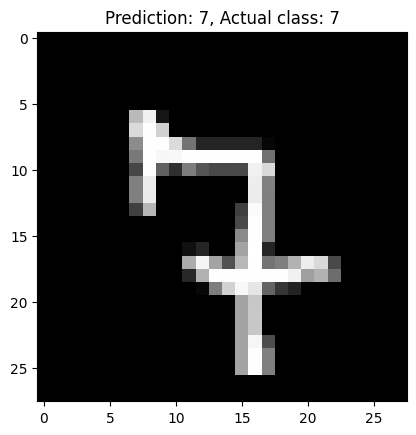

In [22]:
# We may now check the model's prediction for random images:
def display_image(image, prediction, actual_class):
  plt.imshow(image, cmap='gray')
  plt.title(f'Prediction: {prediction}, Actual class: {actual_class}')
  plt.show()

n = np.random.randint(0, len(test_images))
image = test_images[n]
prediction = model.predict(image.reshape(1, 28, 28, 1))[0]
prediction = np.where(prediction > 0.5)[0][0]
actual_class = test_labels[n]
actual_class = np.squeeze(np.where(actual_class>0.5))
display_image(image, prediction, actual_class)

313/313 [==============================] - 1s 2ms/step


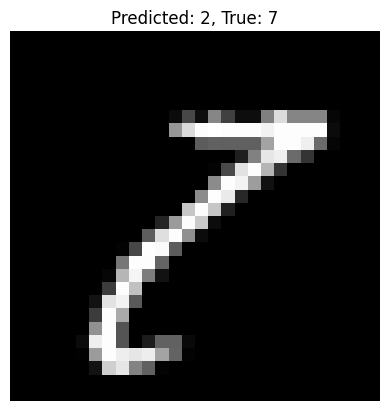

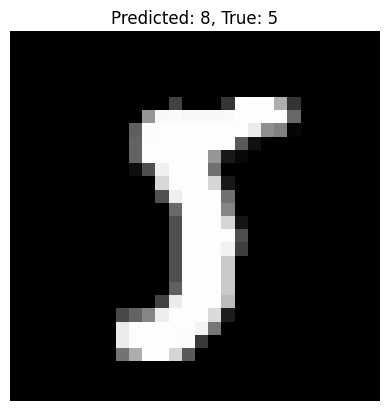

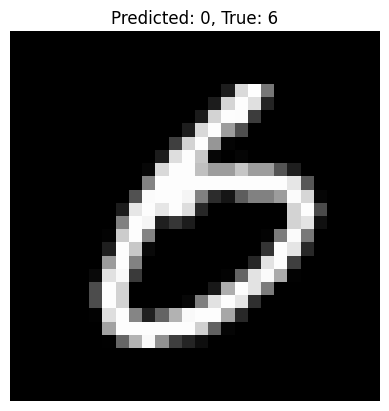

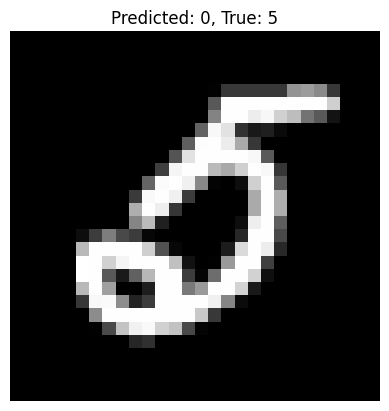

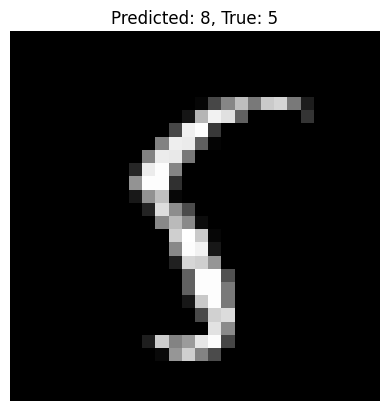

In [25]:
# We can also take a look at what images were missclassified by the model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
misclassified_indices = np.where(predicted_labels != true_labels)[0]

num_misclassified_to_display = 5
for i in range(min(num_misclassified_to_display, len(misclassified_indices))):
    index = misclassified_indices[np.random.randint(0, len(misclassified_indices))]
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[index]}, True: {true_labels[index]}")
    plt.axis('off')
    plt.show()